# Boosting
## AdaBoost (AdaBoostClassifier / AdaBoostRegressor)
#### base_estimator: 子模型
#### n_estimators: 子模型數量
#### learning_rate: 子模型權重縮減係數
#### Boosting Tree
## Gradient Boost (GradientBoostingClassifier / GradientBoostingRegressor)
#### loss: 損失函數
#### n_estimators: 子模型數量
#### learning_rate: 子模型縮減係數

## 載入Iris資料集

In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os,sys
sys.path.append(os.path.abspath('./')) #for import common.utility
from utility import plot_confusion_matrix,plot_decision_regions,testcase_report

## AdaBoost (Adaptive Boosting) Algorithm

In [2]:
from sklearn.ensemble import AdaBoostClassifier


In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
#iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
#只取 target 0,2
#iris_data = iris_data[iris_data['target'].isin([1,2])]
print(iris_data.shape)

target_names: ['setosa' 'versicolor' 'virginica']
(150, 5)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
     iris_data.drop(['target'],axis=1), iris_data['target'], test_size=0.3)#random_state=0

In [5]:
AdaBoost = AdaBoostClassifier(n_estimators=100) 
AdaBoost.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [52]:
#from sklearn.ensemble import GradientBoostingClassifier # Use other Classifier
#AdaBoost = GradientBoostingClassifier()
#AdaBoost.fit(X_train, y_train)

GradientBoostingClassifier()

In [6]:
print('training score:',AdaBoost.score(X_train,y_train))
print('test score:',AdaBoost.score(X_test,y_test))

training score: 0.9523809523809523
test score: 0.9333333333333333


In [7]:
report=testcase_report(iris_data,AdaBoost,X_train,X_train,y_train)
report[0]

accuracy: 0.9523809523809523
error_index : [40 52 53 57 70]
miss classification : [1 1 1 1 2]
number of errors :5/105
error data index: Int64Index([123, 127, 106, 126, 83], dtype='int64')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred
123,6.3,2.7,4.9,1.8,2,1
127,6.1,3.0,4.9,1.8,2,1
106,4.9,2.5,4.5,1.7,2,1
126,6.2,2.8,4.8,1.8,2,1
83,6.0,2.7,5.1,1.6,1,2


In [8]:
report=testcase_report(iris_data,AdaBoost,X_test,X_test,y_test)
report[0]

accuracy: 0.9333333333333333
error_index : [16 28 43]
miss classification : [1 2 1]
number of errors :3/45
error data index: Int64Index([121, 77, 138], dtype='int64')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred
121,5.6,2.8,4.9,2.0,2,1
77,6.7,3.0,5.0,1.7,1,2
138,6.0,3.0,4.8,1.8,2,1


In [9]:
AdaBoost.predict(X_test)

array([2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 0, 1,
       1, 1, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       0])

In [10]:
y_test.values

array([2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0, 1,
       1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       0])

In [11]:
importances = AdaBoost.feature_importances_
print(importances)
indices = np.argsort(importances)  #np.argsort :Returns the indices that would sort an array.
print(indices)

[0.  0.  0.5 0.5]
[0 1 2 3]


In [12]:
features =X_train.keys()
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


Text(0.5, 0, 'Relative Importance')

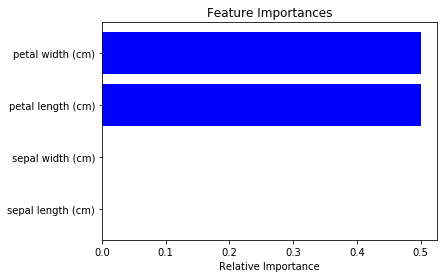

In [13]:
plt.figure(1)
print(features[indices])
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')